# 1. iris data -> DBSCAN

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis = 1)

In [3]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
model = DBSCAN(eps = 0.3, min_samples = 6)
pred = pd.DataFrame(model.fit_predict(feature))
pred.columns = ['pred']

r = pd.concat([feature, pred], axis = 1)
r

,Sepal length,Sepal width,Petal length,Petal width,pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


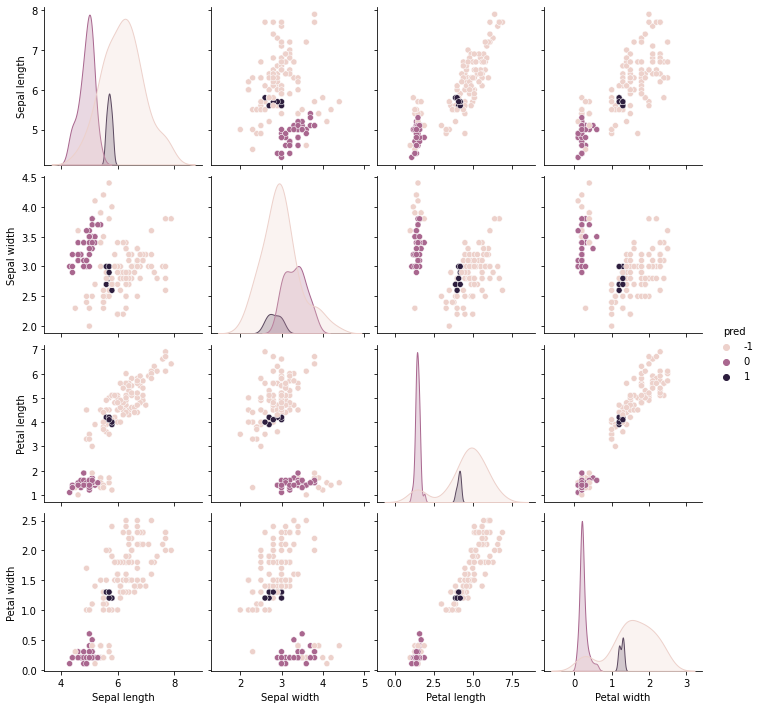

In [7]:
sns.pairplot(r, hue = 'pred')

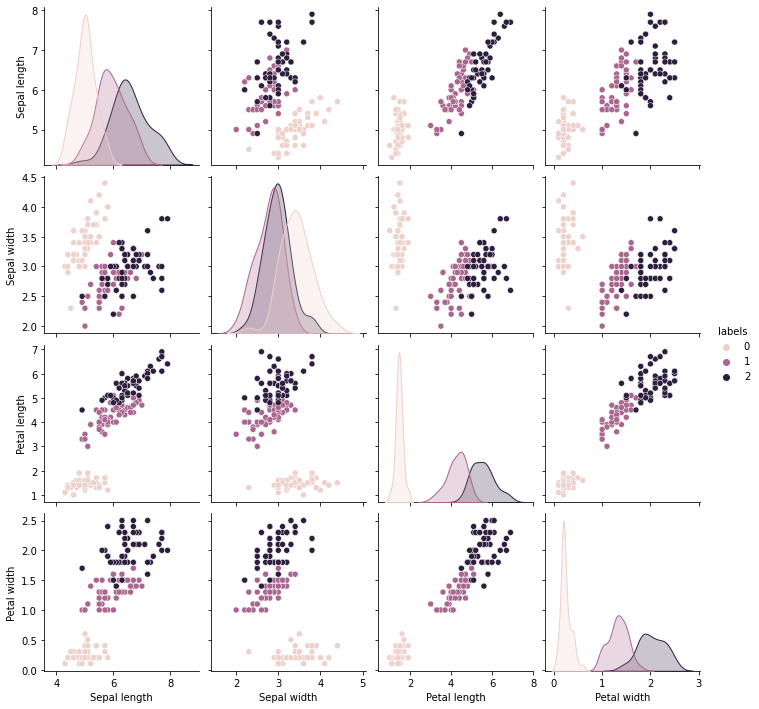

In [8]:
sns.pairplot(data, hue = 'labels')

# 2. Kmeans 결과와 비교

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state = 21)
km.fit(feature)

/Users/hyebin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [10]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ['pred']

In [11]:
r2 = pd.concat([feature, new_labels], axis = 1)

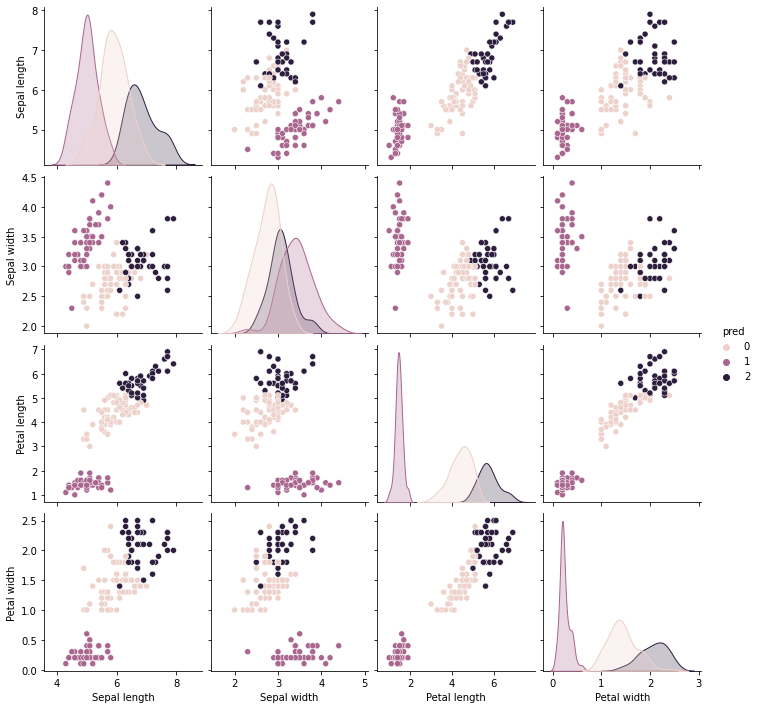

In [12]:
sns.pairplot(r2, hue = 'pred')

# 3. clustering 비교

In [13]:
import numpy as np
import time
%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.25, 's': 80, 'linewidths': 0}

In [14]:
data = np.load('./data/clusterable_data.npy')

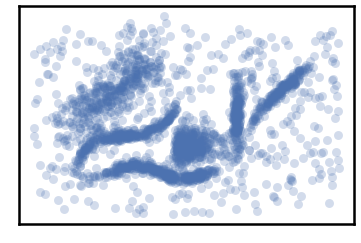

In [15]:
plt.scatter(data.T[0], data.T[1],  c = 'b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [16]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    plt.scatter(data.T[0], data.T[1], c = colors, **plot_kwds)
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize = 15)
    plt.text(-0.3, -0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize = 15)

## 3-1. KMeans

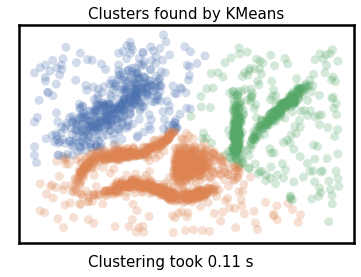

In [17]:
plot_clusters(data, KMeans, () , {'n_clusters': 3})

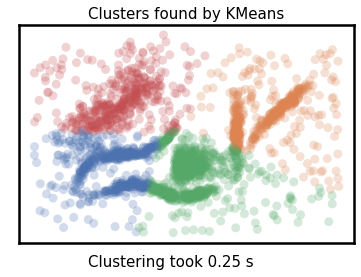

In [18]:
plot_clusters(data, KMeans, () , {'n_clusters': 4})

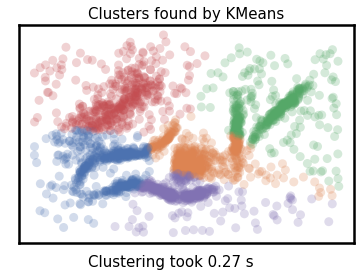

In [19]:
plot_clusters(data, KMeans, () , {'n_clusters': 5})

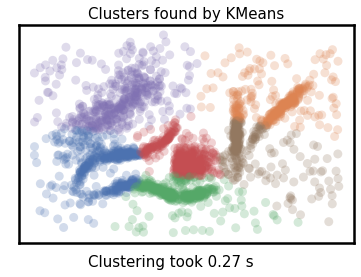

In [20]:
plot_clusters(data, KMeans, () , {'n_clusters': 6})

## 3-2. DBSCAN

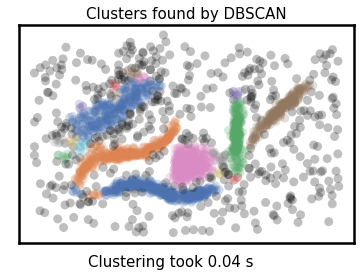

In [21]:
plot_clusters(data, DBSCAN, () , {'eps': 0.02})

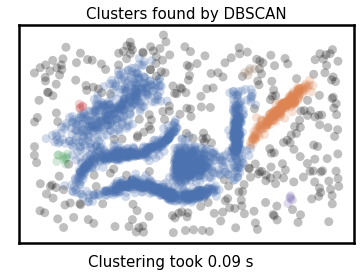

In [22]:
plot_clusters(data, DBSCAN, (), {'eps':0.03})

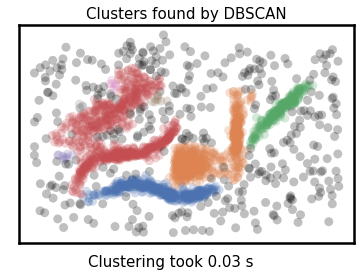

In [23]:
plot_clusters(data, DBSCAN, (), {'eps':0.025})

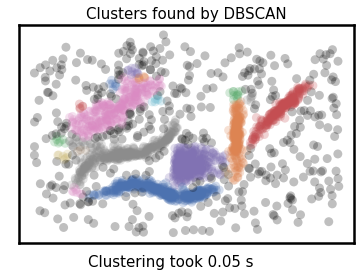

In [24]:
plot_clusters(data, DBSCAN, (), {'eps':0.022})

## 3-3. HDBSCAN

DBSCAN의 발전된 버전, 하이퍼 파라미터에 덜 민감함

In [25]:
# pip install hdbscan

In [26]:
import hdbscan

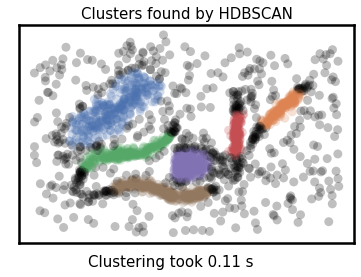

In [28]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 45})

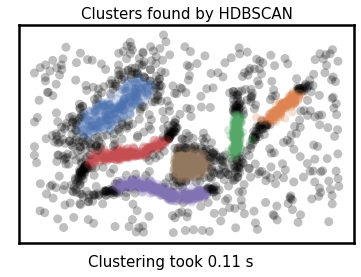

In [30]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 55})

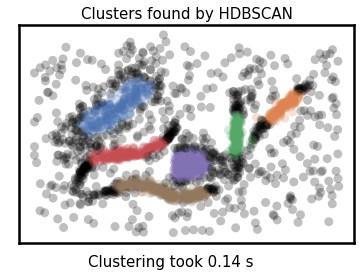

In [31]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 60})

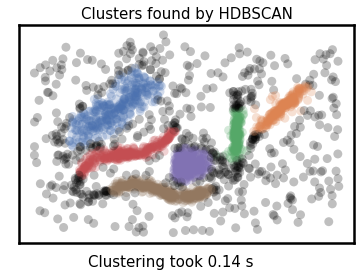

In [32]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 30})

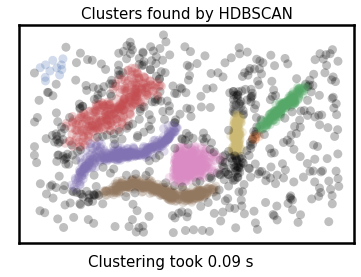

In [33]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 10})

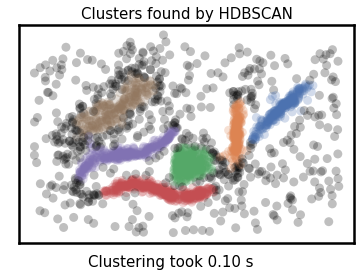

In [34]:
plot_clusters(data, hdbscan.HDBSCAN , (), {'min_cluster_size': 20})